## **Bank Statement Classification Model**

In [ ]:
#need to install pytersseract before importing it
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import cv2
import pytesseract
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re 
import string
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
#git clone the image dataset from GitHub
url = 'https://github.com/ScarlettQiu/OCR_for_Bank_Statement/tree/dc3b2388bc59637feef5cfafa6b146f6511cc3b4/Dataset'
!git clone https://github.com/ScarlettQiu/OCR_for_Bank_Statement.git 

fatal: destination path 'OCR_for_Bank_Statement' already exists and is not an empty directory.


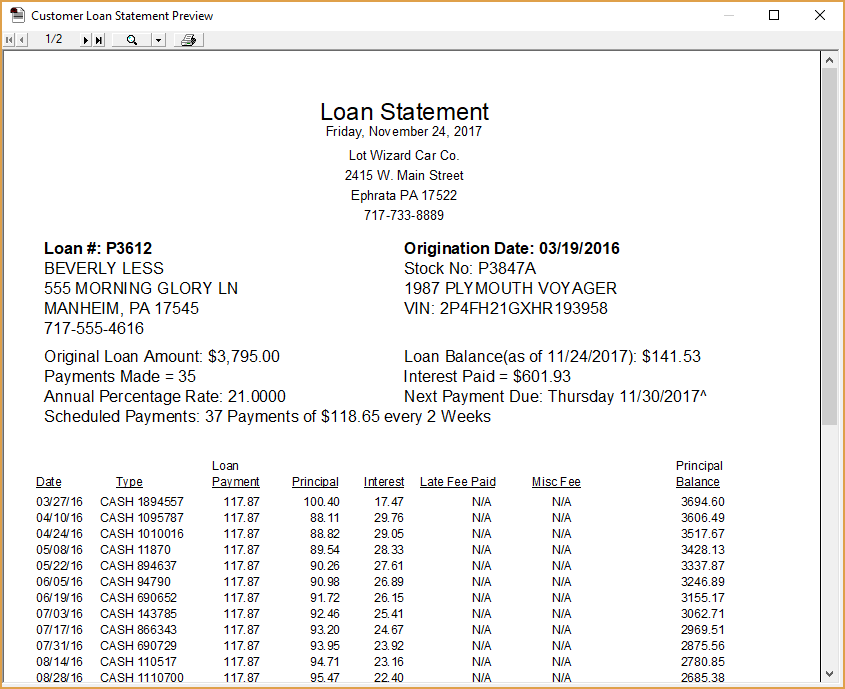

In [ ]:
#Check whether the image could be read
from PIL import Image
Image.open('OCR_for_Bank_Statement/Dataset/loan1.png')

In [ ]:
#create the list of image names
statement = ['loan1.png','loan2.png','loan3.png','loan4.png','loan5.png', 'payment.png', 'payment2.png', 'payment3.png', 'payment4.png', 'payment5.png', 'trans1.png', 'trans2.png', 'trans3.png', 'trans4.png', 'trans5.png']

In [ ]:
#the classes of the images
tag = ['loan', 'loan','loan','loan','loan', 'payment', 'payment', 'payment', 'payment', 'payment', 'trans', 'trans', 'trans', 'trans', 'trans']

In [ ]:
#create a dataframe of image dataset
df =  pd.DataFrame(
    {'statement': statement,
     'class': tag
    })

In [ ]:
df

,statement,class
0,loan1.png,loan
1,loan2.png,loan
2,loan3.png,loan
3,loan4.png,loan
4,loan5.png,loan
5,payment.png,payment
6,payment2.png,payment
7,payment3.png,payment
8,payment4.png,payment
9,payment5.png,payment


Text(0.5, 1.0, 'Frequency of Classes')

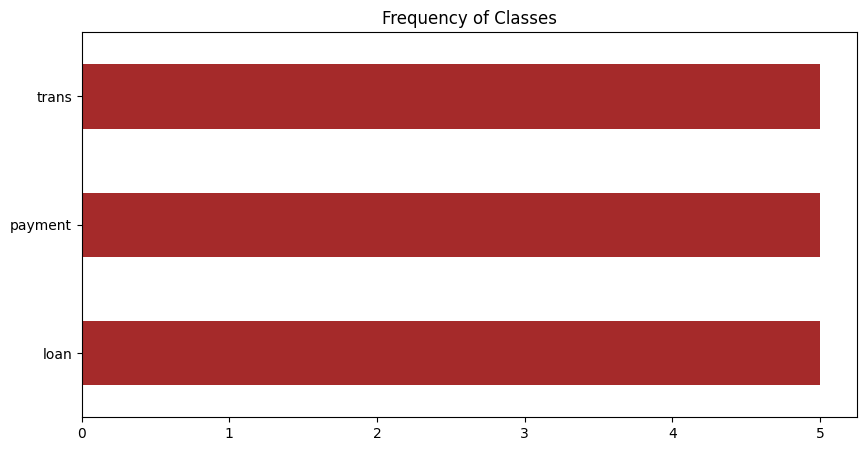

In [ ]:
#Check the frequency of classes
fig, ax = plt.subplots(figsize=(10, 5))
df['class'].value_counts().plot.barh(color="brown")
ax.set_title(f"Frequency of Classes")

In [ ]:
#convert all images to string
img=[]
for i in df['statement']:
  #convert image to string
  image = cv2.imread('OCR_for_Bank_Statement/Dataset/'+i)
  img.append(image)

In [ ]:
#create a function to display all the images
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Images of the dataset", fontsize=16)
    for i in range(15):
        plt.subplot(3,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(labels[i])
    plt.show()

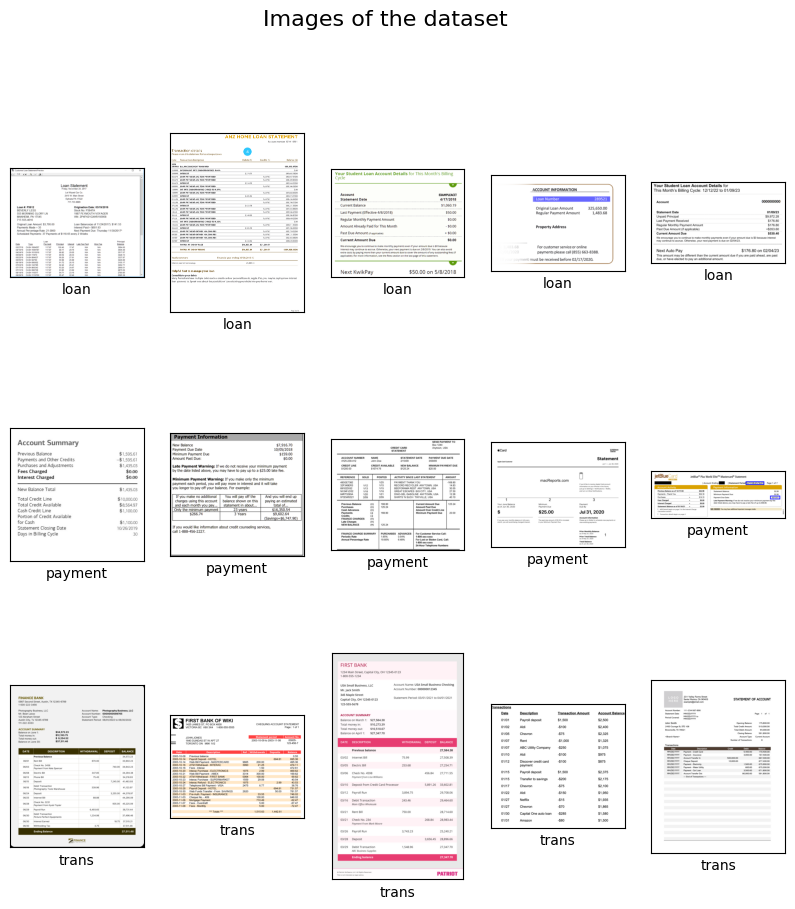

In [ ]:
display_examples(statement, img, tag)

In [ ]:
# Mention the installed location of Tesseract-OCR in your system
#pytesseract.pytesseract.tesseract_cmd = '/usr/local/lib/python3.10/dist-packages'

In [ ]:
#extract text from images using pytesseract
text = []
for i in img:
  t = pytesseract.image_to_string(i)
  text.append(t)

In [ ]:
#convert the text of each image to corpus
corpus = []
for sentence in text: 
    word_list = sentence.split("\n")
    corpus.append(word_list)

In [ ]:
corpus

[[' ',
  '',
  ' ',
  '',
  '$B) Customer Loan Statement Preview',
  'uf V2 vin) Q |x|',
  '',
  ' ',
  '',
  'Loan #: P3612',
  'BEVERLY LESS',
  '',
  '555 MORNING GLORY LN',
  '',
  'MANHEIM, PA 17545,',
  '717-555-4616',
  '',
  'Original Loan Amount: $3,795.00',
  '',
  'Payments Made = 35',
  '',
  'Annual Percentage Rate: 21.0000',
  '',
  'Loan Statement',
  'Friday, November 24, 2017',
  'Lot Wizard Car Co.',
  '2415 W. Main Street',
  'Ephrata PA 17522,',
  '717-733-8889',
  '',
  'Origination Date: 03/19/2016',
  'Stock No: P3847A.',
  '',
  '1987 PLYMOUTH VOYAGER,',
  'VIN: 2P4FH21GXHR193958',
  '',
  'Loan Balance(as of 11/24/2017): $141.53',
  'Interest Paid = $601.93',
  'Next Payment Due: Thursday 11/30/2017"',
  '',
  '‘Scheduled Payments: 37 Payments of $118.65 every 2 Weeks',
  '',
  ' ',
  '',
  ' ',
  '',
  'Loan',
  'Date Tue Payment',
  '0327/18 CASH 1894557 117.87',
  '041018 CASH 1095787 117.87',
  'ow2418 CASH 1010016 117.87',
  'og/08/18 CASH 11870 117.87',
 

In [ ]:
#remove those blank elements
new_list = [[s for s in l if len(s)>0] for l in corpus]

In [ ]:
#remove more blank elements
new_list = [[s for s in l if s != ' '] for l in new_list]
new_list = [[s for s in l if s != '     '] for l in new_list]
new_list = [[s for s in l if s != '   '] for l in new_list]

In [ ]:
#lower all the letters
new_list = [[s.lower() for s in l] for l in new_list]

In [ ]:
#tokenize the words
word_tokens = [[s.split(" ") for s in l] for l in new_list]

In [ ]:
#add the work tokens to the dataframe as a new column
df['word_tokens'] = word_tokens

In [ ]:
df

,statement,class,word_tokens
0,loan1.png,loan,"[[$b), customer, loan, statement, preview], [u..."
1,loan2.png,loan,"[[anz, home, loan, statement], [account, numbe..."
2,loan3.png,loan,"[[your, student, loan, account, details, for, ..."
3,loan4.png,loan,"[[account, information], [loan, number, v2:ss,..."
4,loan5.png,loan,"[[your, student, loan, account, details, for],..."
5,payment.png,payment,"[[account, summary], [previous, balance], [pay..."
6,payment2.png,payment,"[[payment, information], [new, balance], [paym..."
7,payment3.png,payment,"[[send, payment, to], [box, 1244], [credit, ca..."
8,payment4.png,payment,"[[card], [gman], [s], [statement], [jun, 1—, j..."
9,payment5.png,payment,"[[jetbluecarc, jetblue®, plus, world, elite™, ..."


In [ ]:
#explode the nested list
import itertools
df['word_tokens'] = [list(itertools.chain.from_iterable(z)) for z in df['word_tokens']]

In [ ]:
df['word_tokens']

0     [$b), customer, loan, statement, preview, uf, ...
1     [anz, home, loan, statement, account, number, ...
2     [your, student, loan, account, details, for, t...
3     [account, information, loan, number, v2:ss, lv...
4     [your, student, loan, account, details, for, t...
5     [account, summary, previous, balance, payments...
6     [payment, information, new, balance, payment, ...
7     [send, payment, to, box, 1244, credit, card, a...
8     [card, gman, s, statement, jun, 1—, jun, 30,, ...
9     [jetbluecarc, jetblue®, plus, world, elite™, m...
10    [finance, bank, 0987, second, street,, austin,...
11    [«j, first, bank, of, wiki, >, 1425, james, st...
12    [first, bank, 1234, main, street,, capital, ci...
13    [transactions, date, 01/01, 01/02, 01/05, 01/0...
14    [231, valley, farms, street, ‘santa, monica,, ...
Name: word_tokens, dtype: object

In [ ]:
#text preproscessing: remove numbers, remove length <=2, remove punctuations and stopwords
from string import digits
filtered_text = [[s.translate(str.maketrans('', '', string.punctuation)) for s in l] for l in df['word_tokens']]
filtered_text = [[s.translate(str.maketrans('', '', digits)) for s in l] for l in filtered_text]
filtered_text = [[s for s in l if len(s)>2] for l in filtered_text]
stop_words = set(stopwords.words('english'))
stop_words.update(['', 'na', "na,", '$b)', '=', '©', '—', '#:', '-', '|', '+', '\x0c'])  # Add custom stopwords
filtered_text = [[s for s in l if s not in stop_words] for l in filtered_text]

#convert all words to their stem
stemmer = SnowballStemmer('english')
filtered_text = [[stemmer.stem(s) for s in l] for l in filtered_text]

In [ ]:
#add another column to the dataframe which contained the processed words of each image
df['filtered_text'] = filtered_text

In [ ]:
df['filtered_text']

0     [custom, loan, statement, preview, vin, loan, ...
1     [anz, home, loan, statement, account, number, ...
2     [student, loan, account, detail, month, bill, ...
3     [account, inform, loan, number, vss, origin, l...
4     [student, loan, account, detail, month, bill, ...
5     [account, summari, previous, balanc, payment, ...
6     [payment, inform, new, balanc, payment, due, d...
7     [send, payment, box, credit, card, anytowm, us...
8     [card, gman, statement, jun, jun, appl, card, ...
9     [jetbluecarc, jetblue®, plus, world, elite™, m...
10    [financ, bank, second, street, austin, photogr...
11    [first, bank, wiki, jame, box, chequ, account,...
12    [first, bank, main, street, capit, citi, usa, ...
13    [transact, date, descript, payrol, deposit, al...
14    [valley, farm, street, santa, monica, statemen...
Name: filtered_text, dtype: object

In [ ]:
#find the top 5 most common words in each bank statement
from collections import Counter

for i in df['filtered_text']:
  counts = Counter(i).most_common(5)
  print(counts)

[('cash', 12), ('loan', 6), ('payment', 5), ('statement', 2), ('vin', 2)]
[('loan', 17), ('payment', 13), ('anz', 11), ('tdm', 10), ('privatis', 10)]
[('amount', 7), ('month', 4), ('payment', 4), ('current', 3), ('due', 3)]
[('loan', 2), ('amount', 2), ('payment', 2), ('account', 1), ('inform', 1)]
[('amount', 7), ('due', 6), ('payment', 4), ('month', 3), ('account', 2)]
[('credit', 5), ('total', 3), ('balanc', 2), ('charg', 2), ('line', 2)]
[('payment', 8), ('pay', 6), ('minimum', 5), ('balanc', 3), ('due', 3)]
[('payment', 6), ('usa', 6), ('credit', 5), ('due', 4), ('amount', 4)]
[('balanc', 5), ('payment', 5), ('jun', 4), ('due', 4), ('card', 3)]
[('payment', 6), ('statement', 4), ('page', 3), ('balanc', 3), ('charg', 3)]
[('balanc', 5), ('account', 4), ('bill', 4), ('photographi', 3), ('check', 3)]
[('payment', 5), ('interac', 5), ('withdraw', 3), ('deposit', 3), ('web', 3)]
[('busi', 3), ('account', 3), ('check', 3), ('balanc', 3), ('bill', 3)]
[('aldi', 3), ('chevron', 3), ('tran

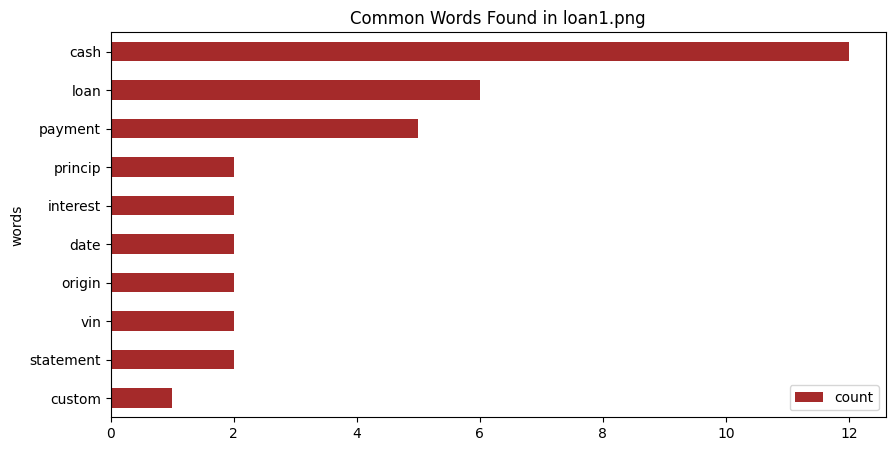

       words  count
0       cash     12
1       loan      6
2    payment      5
3  statement      2
4        vin      2
5     origin      2
6       date      2
7   interest      2
8    princip      2
9     custom      1


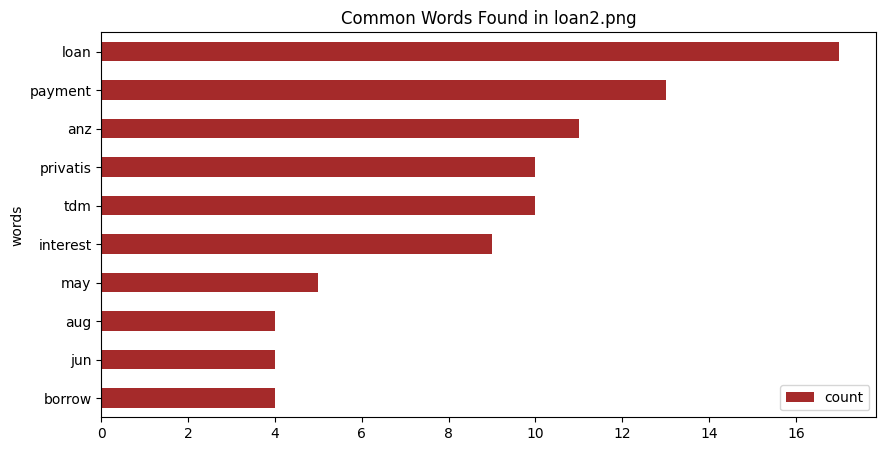

      words  count
0      loan     17
1   payment     13
2       anz     11
3       tdm     10
4  privatis     10
5  interest      9
6       may      5
7    borrow      4
8       jun      4
9       aug      4


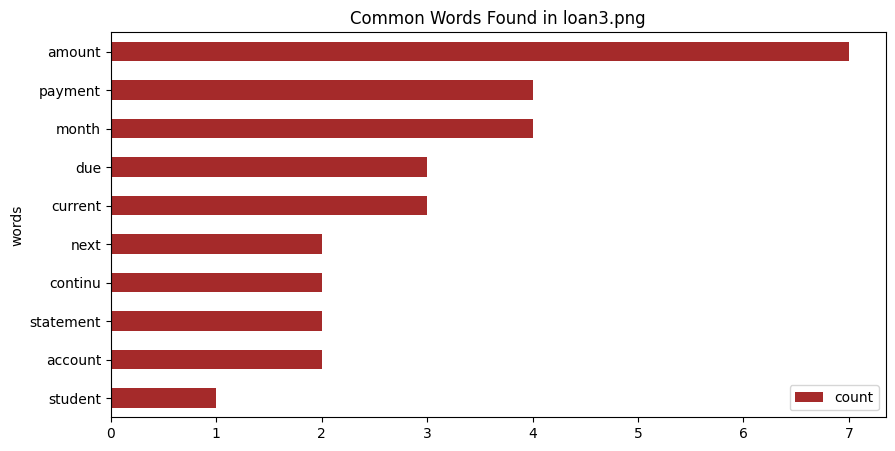

       words  count
0     amount      7
1      month      4
2    payment      4
3    current      3
4        due      3
5    account      2
6  statement      2
7    continu      2
8       next      2
9    student      1


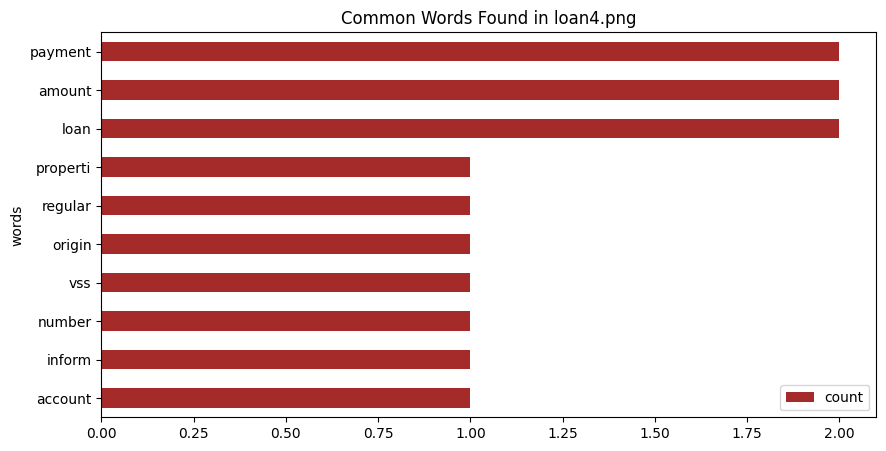

      words  count
0      loan      2
1    amount      2
2   payment      2
3   account      1
4    inform      1
5    number      1
6       vss      1
7    origin      1
8   regular      1
9  properti      1


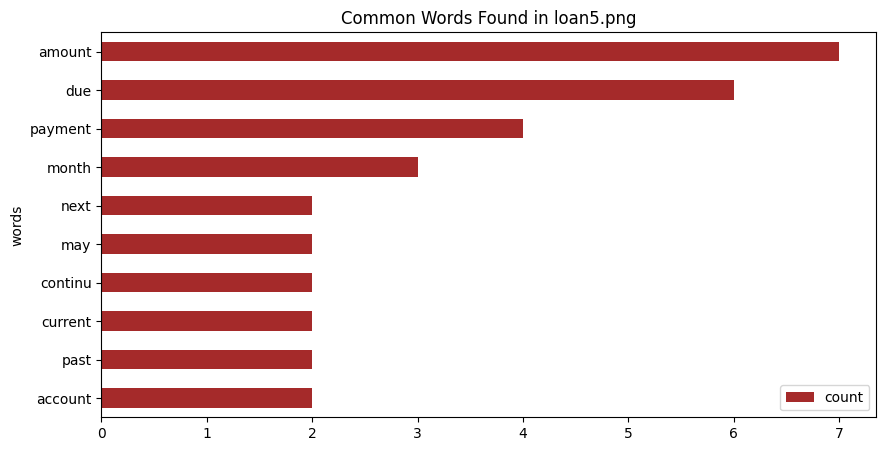

     words  count
0   amount      7
1      due      6
2  payment      4
3    month      3
4  account      2
5     past      2
6  current      2
7  continu      2
8      may      2
9     next      2


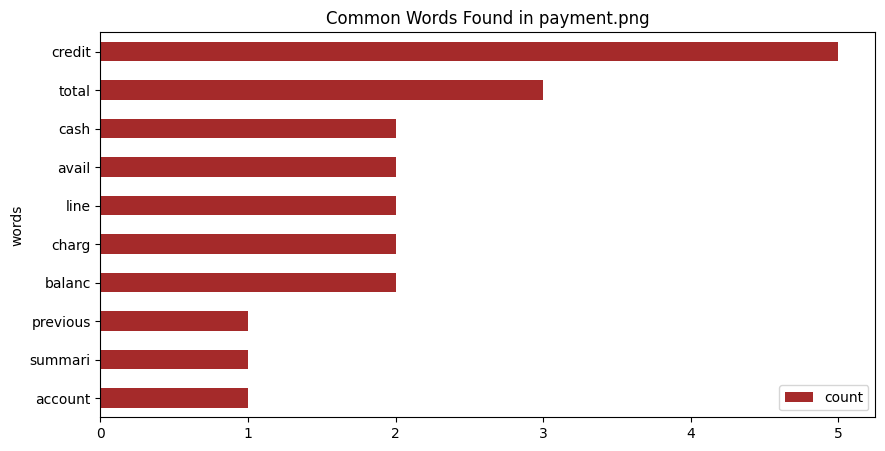

      words  count
0    credit      5
1     total      3
2    balanc      2
3     charg      2
4      line      2
5     avail      2
6      cash      2
7   account      1
8   summari      1
9  previous      1


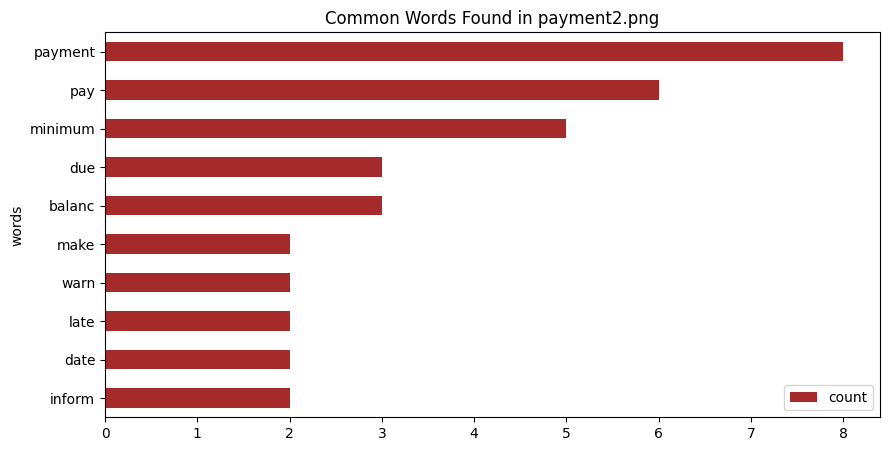

     words  count
0  payment      8
1      pay      6
2  minimum      5
3   balanc      3
4      due      3
5   inform      2
6     date      2
7     late      2
8     warn      2
9     make      2


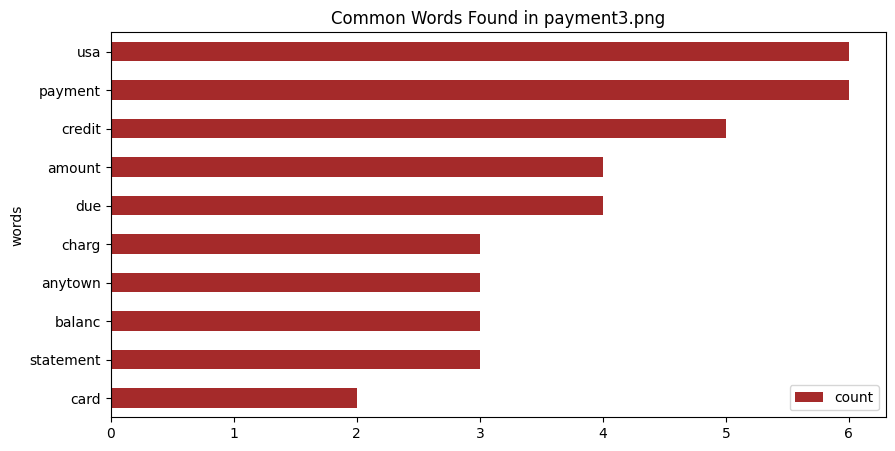

       words  count
0    payment      6
1        usa      6
2     credit      5
3        due      4
4     amount      4
5  statement      3
6     balanc      3
7    anytown      3
8      charg      3
9       card      2


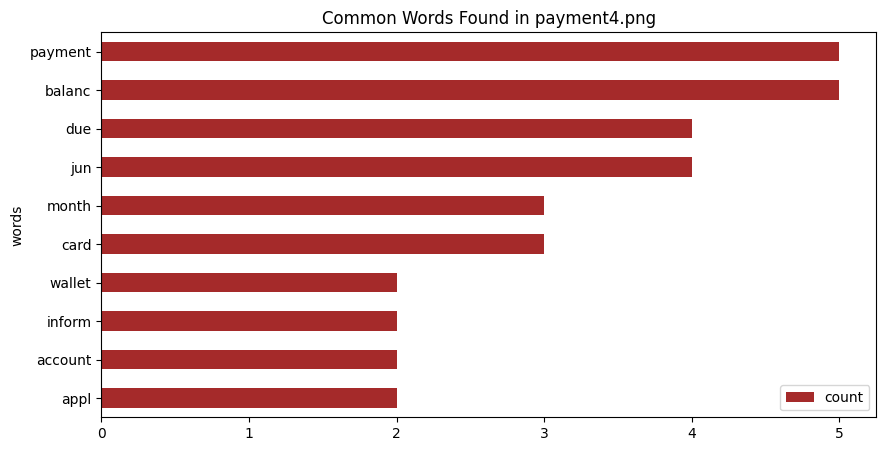

     words  count
0   balanc      5
1  payment      5
2      jun      4
3      due      4
4     card      3
5    month      3
6     appl      2
7  account      2
8   inform      2
9   wallet      2


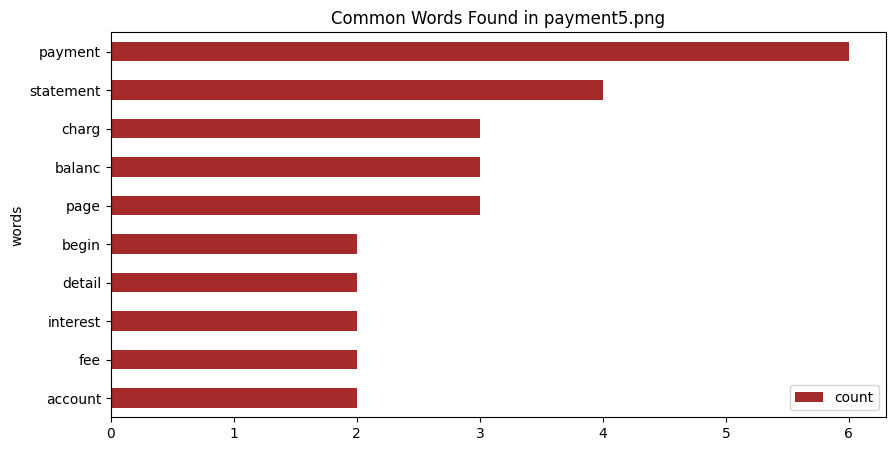

       words  count
0    payment      6
1  statement      4
2       page      3
3     balanc      3
4      charg      3
5    account      2
6        fee      2
7   interest      2
8     detail      2
9      begin      2


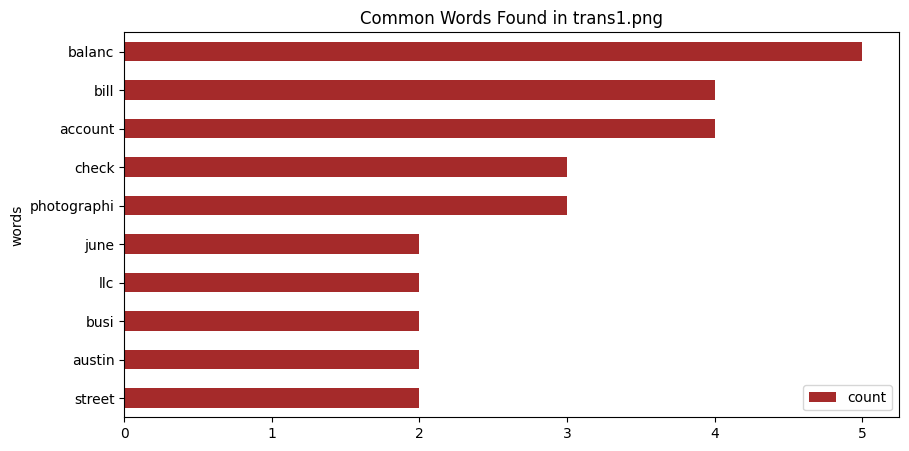

         words  count
0       balanc      5
1      account      4
2         bill      4
3  photographi      3
4        check      3
5       street      2
6       austin      2
7         busi      2
8          llc      2
9         june      2


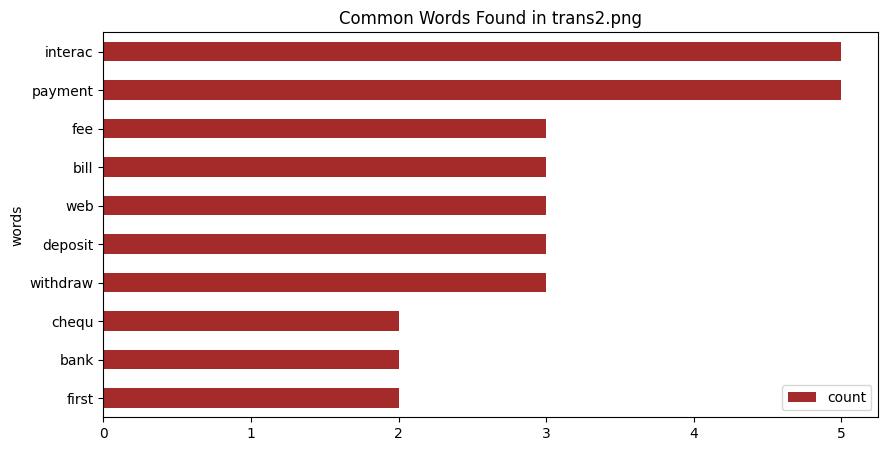

      words  count
0   payment      5
1   interac      5
2  withdraw      3
3   deposit      3
4       web      3
5      bill      3
6       fee      3
7     first      2
8      bank      2
9     chequ      2


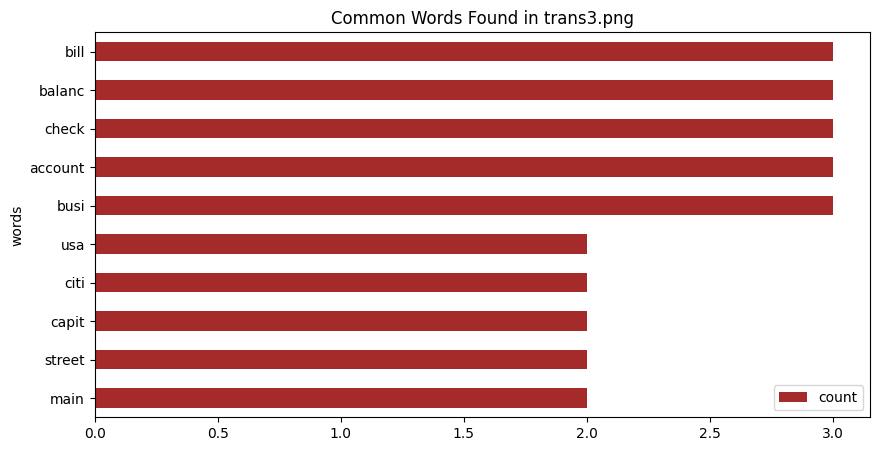

     words  count
0     busi      3
1  account      3
2    check      3
3   balanc      3
4     bill      3
5     main      2
6   street      2
7    capit      2
8     citi      2
9      usa      2


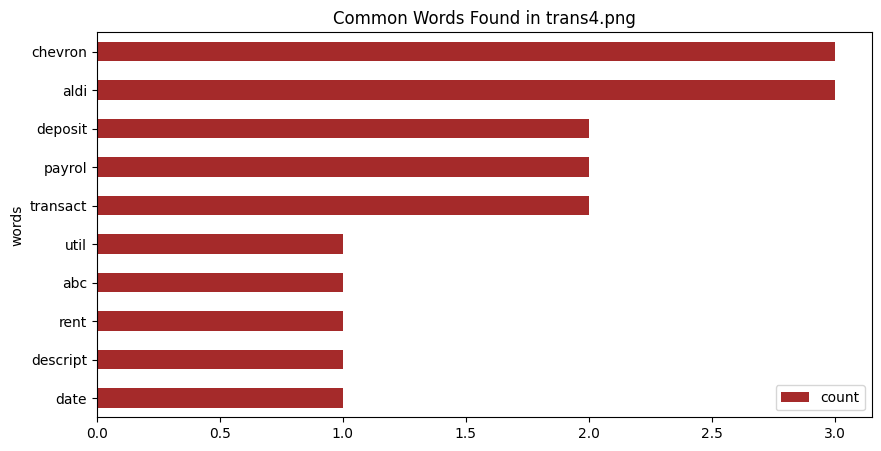

      words  count
0      aldi      3
1   chevron      3
2  transact      2
3    payrol      2
4   deposit      2
5      date      1
6  descript      1
7      rent      1
8       abc      1
9      util      1


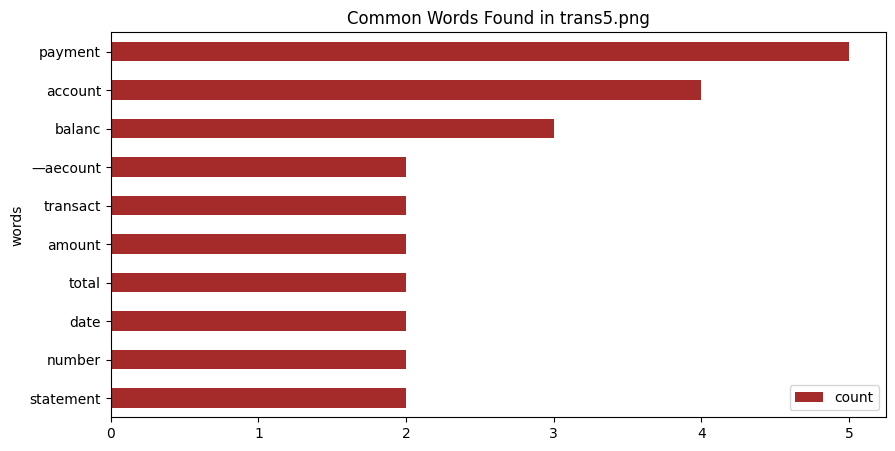

       words  count
0    payment      5
1    account      4
2     balanc      3
3  statement      2
4     number      2
5       date      2
6      total      2
7     amount      2
8   transact      2
9   —aecount      2


In [ ]:
#visualzie the top common words in each statement
from collections import Counter

for i, n in zip(df['filtered_text'], df['statement']):
  counts = Counter(i).most_common(10)
  word_freq = pd.DataFrame(counts,
                             columns=['words', 'count'])
  fig, ax = plt.subplots(figsize=(10, 5))
  word_freq.sort_values(by='count').plot.barh(x='words',y='count',ax=ax, color="brown")
  ax.set_title(f"Common Words Found in {n}")
  plt.show()
  print(word_freq)

In [ ]:
from wordcloud import WordCloud
from textwrap import wrap

In [ ]:
#convert the list of words to string
df['liststring'] = df['filtered_text'].apply(lambda x: ', '.join([str(i) for i in x]))

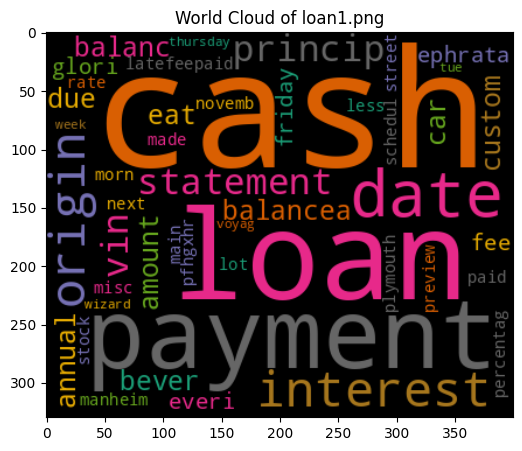

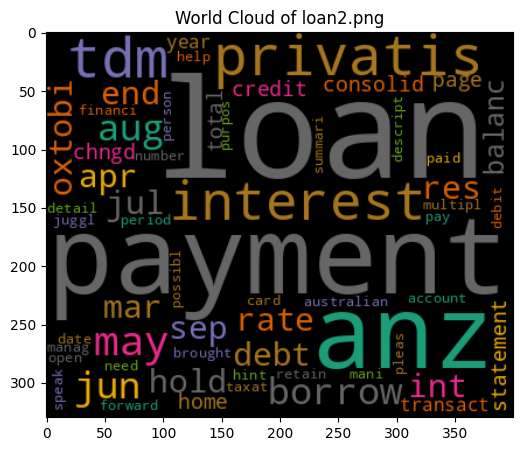

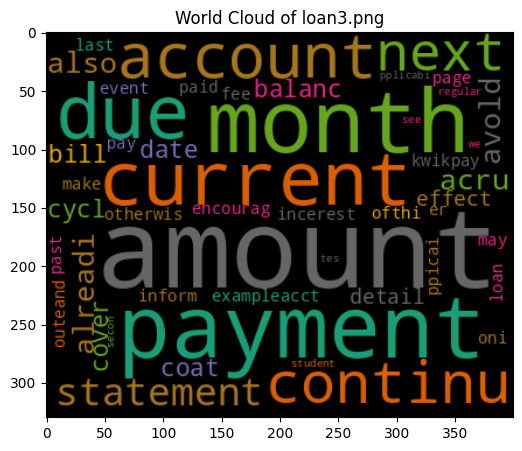

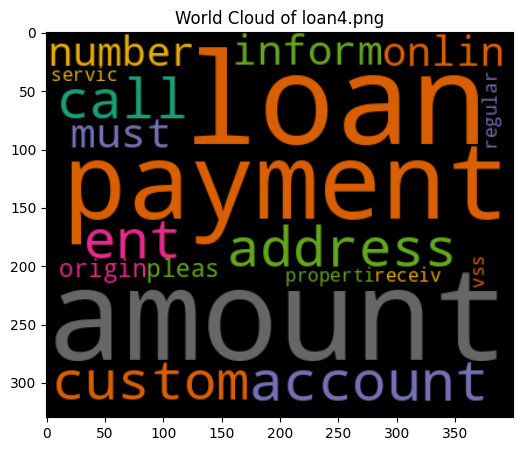

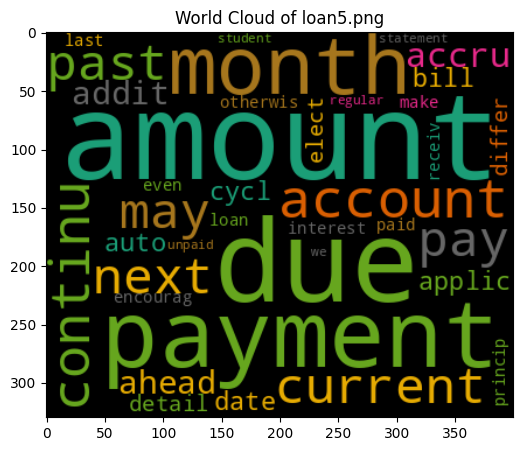

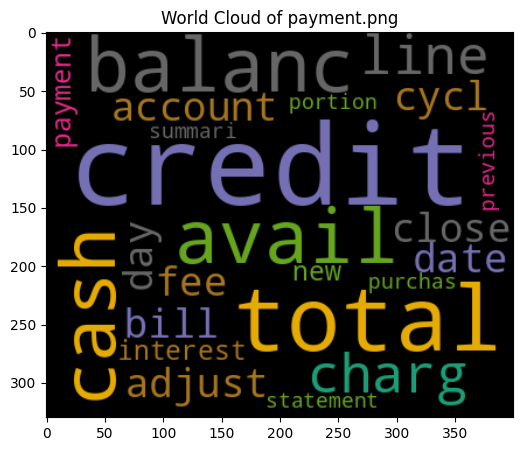

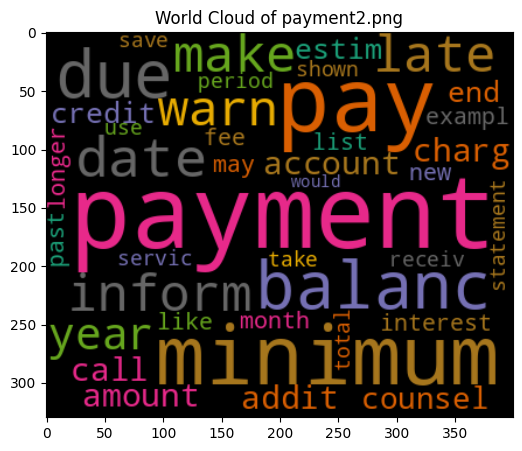

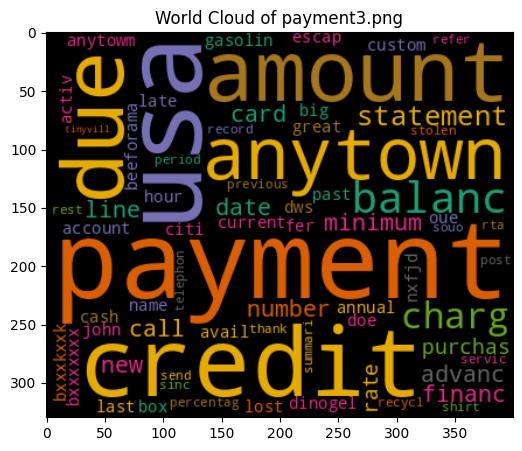

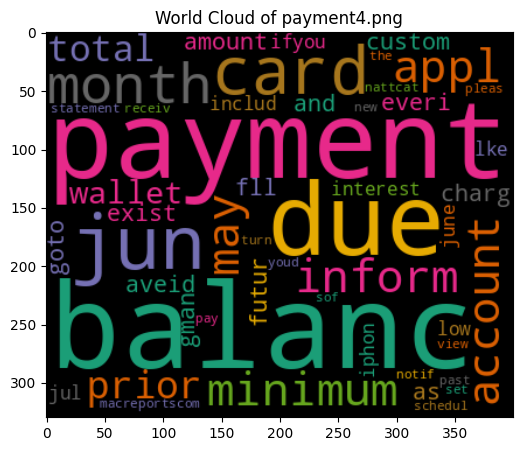

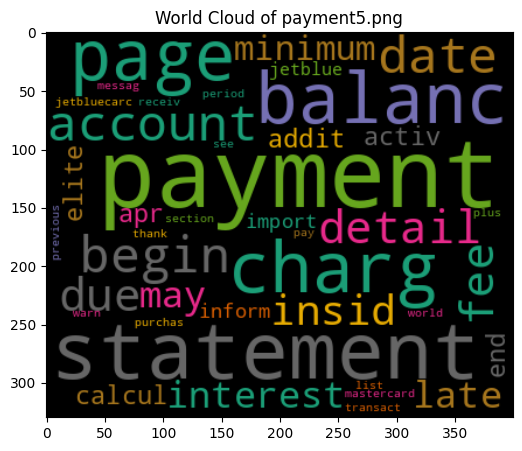

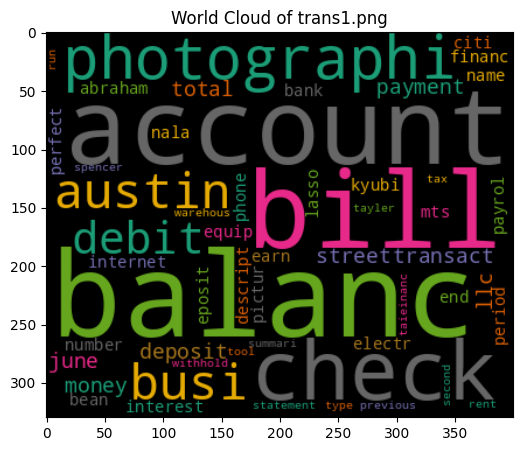

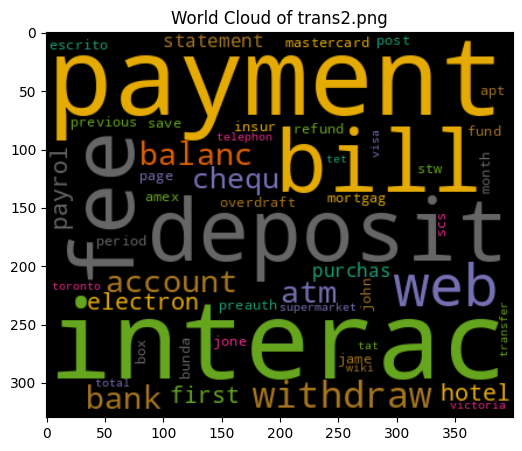

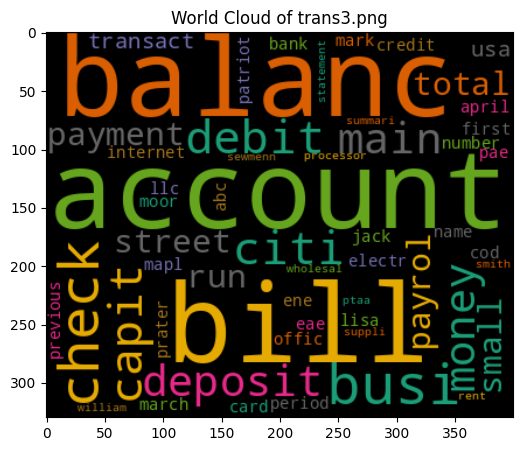

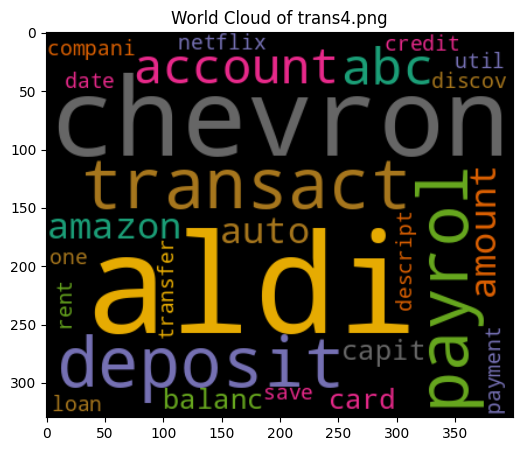

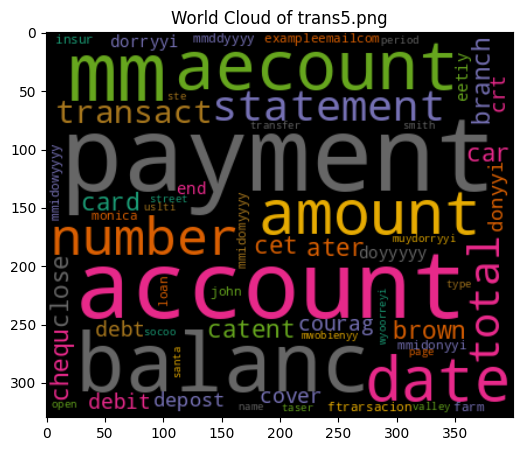

In [ ]:
# Term Document Matrix
for sub, n in zip(df['liststring'], df['statement']):
  sub = [sub]
  vectorizer = CountVectorizer()
  dtm = vectorizer.fit_transform(sub)
  feature_names = vectorizer.get_feature_names_out()
  dtm_df = pd.DataFrame(dtm.toarray(), columns=feature_names)
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(dtm_df.sum())
  plt.figure(figsize=(10, 5))
  plt.imshow(wc, interpolation="bilinear")
  #plt.axis('off')
  plt.title(f"World Cloud of {n}")
  plt.show()

In [ ]:
df['liststring']

0     custom, loan, statement, preview, vin, loan, b...
1     anz, home, loan, statement, account, number, t...
2     student, loan, account, detail, month, bill, c...
3     account, inform, loan, number, vss, origin, lo...
4     student, loan, account, detail, month, bill, c...
5     account, summari, previous, balanc, payment, c...
6     payment, inform, new, balanc, payment, due, da...
7     send, payment, box, credit, card, anytowm, usa...
8     card, gman, statement, jun, jun, appl, card, c...
9     jetbluecarc, jetblue®, plus, world, elite™, ma...
10    financ, bank, second, street, austin, photogra...
11    first, bank, wiki, jame, box, chequ, account, ...
12    first, bank, main, street, capit, citi, usa, s...
13    transact, date, descript, payrol, deposit, ald...
14    valley, farm, street, santa, monica, statement...
Name: liststring, dtype: object

In [ ]:
#Convert each string to a matrix of TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
x = vec.fit_transform(df['liststring'])

In [ ]:
print("Feature Names n",vec.get_feature_names_out())

Feature Names n ['abc' 'abraham' 'account' 'accru' 'acru' 'activ' 'addit' 'address'
 'adjust' 'advanc' 'aecount' 'ahead' 'aldi' 'alreadi' 'also' 'amazon'
 'amex' 'amount' 'and' 'annual' 'anytowm' 'anytown' 'anz' 'appl' 'applic'
 'apr' 'april' 'apt' 'as' 'ater' 'atm' 'aug' 'austin' 'australian' 'auto'
 'avail' 'aveid' 'avold' 'balanc' 'balancea' 'bank' 'bean' 'beeforama'
 'begin' 'bever' 'big' 'bill' 'borrow' 'box' 'branch' 'brought' 'brown'
 'bunda' 'busi' 'bxxxkxxk' 'bxxxxxxx' 'calcul' 'call' 'capit' 'car' 'card'
 'cash' 'catent' 'cet' 'charg' 'check' 'chequ' 'chevron' 'chngd' 'citi'
 'close' 'coat' 'cod' 'compani' 'consolid' 'continu' 'counsel' 'courag'
 'cover' 'credit' 'crt' 'current' 'custom' 'cycl' 'date' 'day' 'debit'
 'debt' 'deposit' 'depost' 'descript' 'detail' 'differ' 'dinogel' 'discov'
 'doe' 'donyyi' 'dorryyi' 'doyyyyy' 'due' 'dws' 'eae' 'earn' 'eat' 'eetiy'
 'effect' 'elect' 'electr' 'electron' 'elite' 'encourag' 'end' 'ene' 'ent'
 'ephrata' 'eposit' 'equip' 'er' 'escap'

In [ ]:
print("Sparse Matrix n",x.shape,"n",x.toarray())

Sparse Matrix n (15, 380) n [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.01379643 ... 0.         0.06930952 0.        ]
 [0.         0.         0.08694425 ... 0.         0.         0.        ]
 ...
 [0.09725053 0.         0.11614942 ... 0.         0.         0.        ]
 [0.1451002  0.         0.05776593 ... 0.         0.         0.        ]
 [0.         0.         0.17139153 ... 0.12394812 0.         0.        ]]


In [ ]:
print(x.shape)

(15, 380)


In [ ]:
#create a dataframe for TF-IDF features
w = pd.DataFrame(x.toarray(), columns=vec.get_feature_names_out())
print(w)

         abc   abraham   account     accru      acru     activ     addit  \
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.000000  0.000000  0.013796  0.000000  0.000000  0.000000  0.000000   
2   0.000000  0.000000  0.086944  0.000000  0.125754  0.000000  0.000000   
3   0.000000  0.000000  0.094118  0.000000  0.000000  0.000000  0.000000   
4   0.000000  0.000000  0.091252  0.131985  0.000000  0.000000  0.102276   
5   0.000000  0.000000  0.063739  0.000000  0.000000  0.000000  0.000000   
6   0.000000  0.000000  0.042545  0.000000  0.000000  0.000000  0.095369   
7   0.000000  0.000000  0.030611  0.000000  0.000000  0.076890  0.000000   
8   0.000000  0.000000  0.078689  0.000000  0.000000  0.000000  0.000000   
9   0.000000  0.000000  0.094739  0.000000  0.000000  0.118986  0.106185   
10  0.000000  0.111162  0.153711  0.000000  0.000000  0.000000  0.000000   
11  0.000000  0.000000  0.066032  0.000000  0.000000  0.000000  0.000000   
12  0.097251

Dimensionality reduction using truncated SVD (aka LSA).  

This transformer performs linear dimensionality reduction by means of 
truncated singular value decomposition (SVD). Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with sparse matrices efficiently.
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100)
res = svd.fit_transform(x)
print(res.shape)

(15, 15)


In [ ]:
#split data
from sklearn.model_selection import train_test_split
y = df["class"].values
X = res
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state=1)

In [ ]:
from sklearn import svm
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

from numpy import mean
from numpy import std

#train an SVM model using linear kernal as it works better with text classification
svm = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo')
svm.fit(train_x, train_y)

SVC(C=1, decision_function_shape='ovo', kernel='linear')

In [ ]:
#get the predictio from SVM model
pred_svm = svm.predict(test_x)

In [ ]:
#Check the accuracy
accuracy_svm = accuracy_score(test_y, pred_svm)
print("Accuracy of SVM:", accuracy_svm)

Accuracy of SVM: 1.0


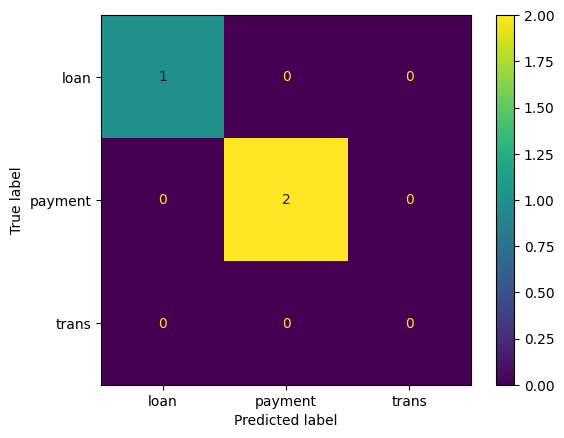

In [ ]:
#Visualize the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_y, pred_svm, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()
plt.show()

Try a Random Forest Model, however the result is no better than SVM, so it is better to use the SVM model even after parameter tuning.

In [ ]:
#import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

In [ ]:
#train the random forst model
rf = RandomForestClassifier(random_state=333)
rf.fit(train_x, train_y)

RandomForestClassifier(random_state=333)

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 333,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#define the parameter distribution for tuning
param_grid = { 
    'n_estimators': [50, 100, 200, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : range(30),
    'criterion' :["gini", "entropy"],
    'min_samples_leaf': range(8)}
optimal_params = GridSearchCV(rf,param_grid,cv =5,scoring = 'accuracy',verbose = 0)

In [ ]:
optimal_params.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=333),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 30),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': range(0, 8),
                         'n_estimators': [50, 100, 200, 500]},
             scoring='accuracy')

In [ ]:
print(optimal_params.best_params_)

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 50}


In [ ]:
rf2 = RandomForestClassifier(random_state=333, max_features='auto', n_estimators= 50, max_depth=3, criterion='entropy', min_samples_leaf =1)
rf2.fit(train_x, train_y)

RandomForestClassifier(criterion='entropy', max_depth=3, max_features='auto',
                       n_estimators=50, random_state=333)

In [ ]:
pred_rf = rf2.predict(test_x)

In [ ]:
accuracy_rf = accuracy_score(test_y, pred_rf)
print("Accuracy of Random Forest:", accuracy_rf)

Accuracy of Random Forest: 0.3333333333333333


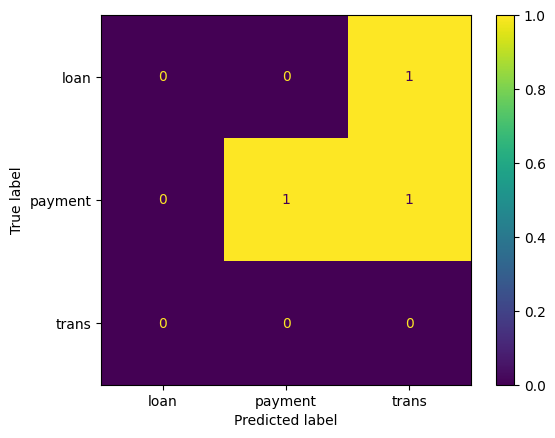

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_y, pred_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()